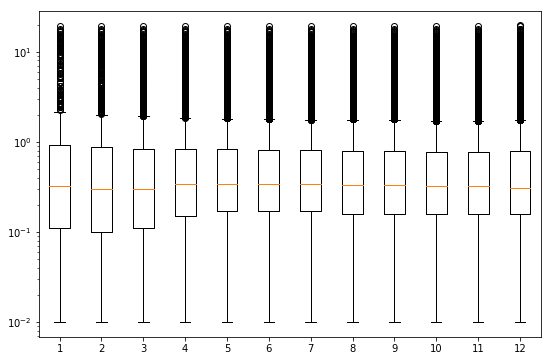

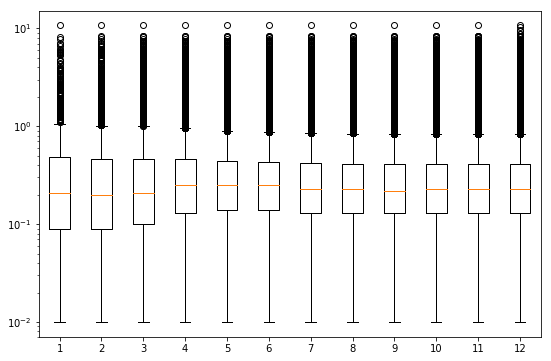

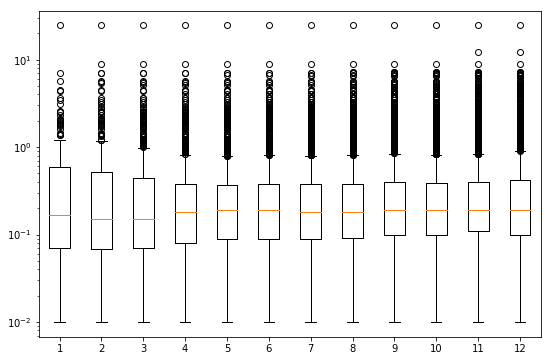

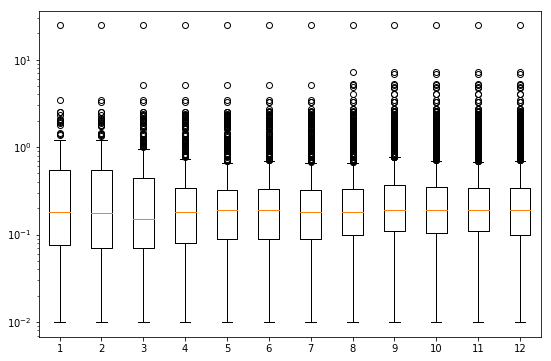

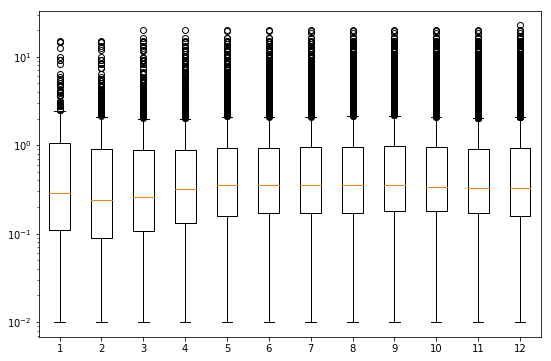

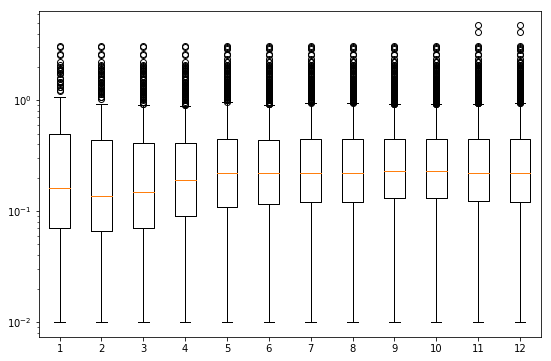

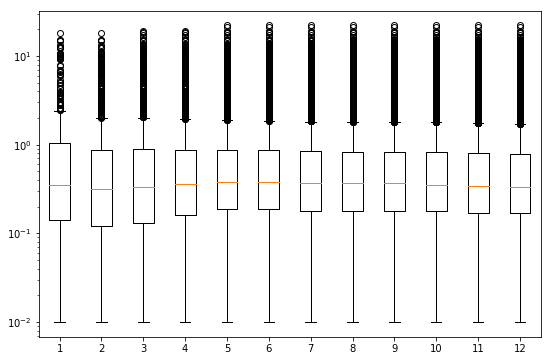

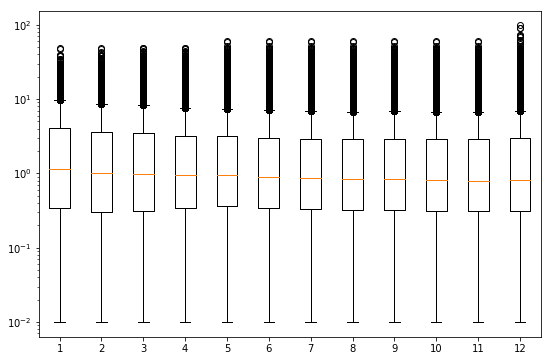

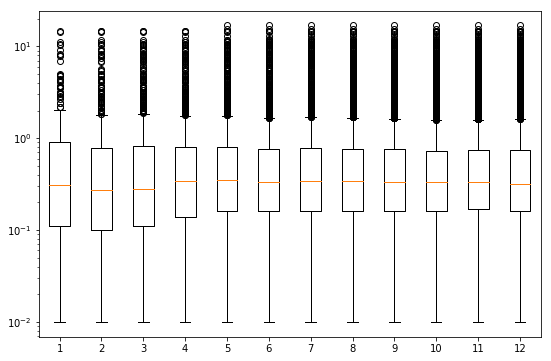

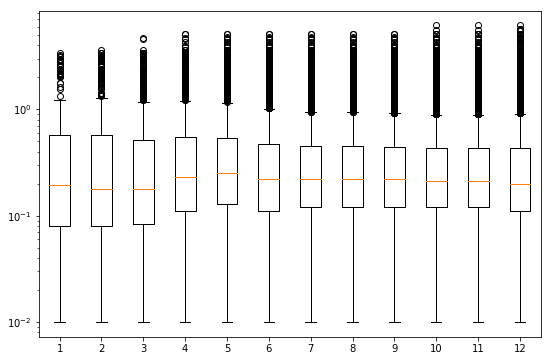

In [34]:
from pathlib import Path
import numpy as np
import pandas as pd
import rasterio
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale

BASEDIR = Path('.').resolve().parent
adm_units = sorted(['_'.join(x.name.split('_')[:3]) for x in BASEDIR.joinpath('datain/HTI/2012/04/subnational/l1').iterdir() if x.name.endswith('.tif')])
#adm_units = ['HTI_Artibonite_1149']
months = sorted([x.name for x in BASEDIR.joinpath('datain/HTI/2013').iterdir() if not 'Annual' in x.name])
#months = ['05','06','07']
years = sorted([x.name for x in BASEDIR.joinpath('datain/HTI').iterdir()])

for unit in adm_units:
    temporal_units = []
    monthly_units = []
    data_array = np.array
    for month in months:
        #for year in years:
        for year in ['2016']:
            raster = BASEDIR.joinpath(f'datain/HTI/{year}/{month}/subnational/l1/{unit}_{month}_{year}.tif')
            if raster.exists():
                with rasterio.open(raster) as src:
                    data = src.read(1)
                    data = data[np.where((data!= -99999)& (data!=0))]
                    #data = data[np.where((data> -99999))]
                    monthly_units.append(data)
        stack_month = np.concatenate(tuple(monthly_units), axis=0)
        temporal_units.append(stack_month)
    #sns.boxplot(data=temporal_units)
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111)
    plt.yscale('log')
    bp = ax.boxplot(temporal_units)
    #bp = plt.boxplot(temporal_units)
    fig.savefig(f'{unit}_2012-2018.png', bbox_inches='tight')
    del fig, bp, monthly_units, temporal_units
                    

In [30]:
print(months)

['04', '05', '06', '07', '08', '09', '10', '11', '12']
